In [ ]:
# @Author:  Vikram(B19CSE098)

import libraries

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

Load data

In [ ]:
#population data as of 2021
df = pd.read_csv("Population - Population.csv")

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude)
)


data type and null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Capital     31 non-null     object  
 1   Latitude    31 non-null     float64 
 2   Longitude   31 non-null     float64 
 3   Population  31 non-null     int64   
 4   geometry    31 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 1.3+ KB


bubble plot of capitals

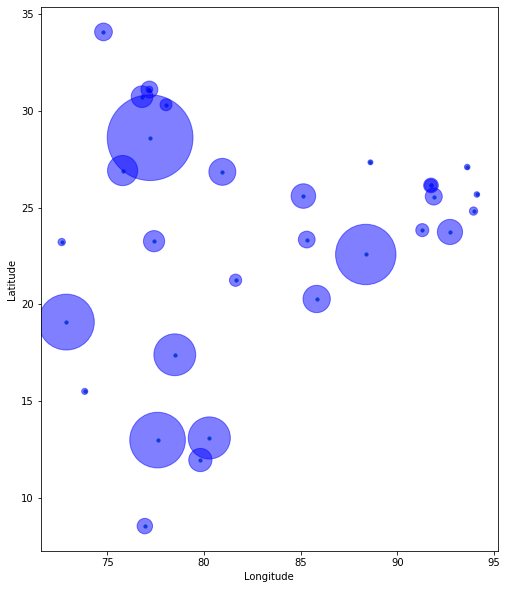

In [ ]:

gdf.plot(figsize=(10, 10), markersize=10)

gdf.plot(
    kind="scatter", x="Longitude", y="Latitude", s=gdf["Population"] / 4000, c="blue", alpha=0.2,
    ax=plt.gca(),
)
plt.show()

*Map* of india using geopandas dataset itself


In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
states = gdf
india = world[world.name == "India"]

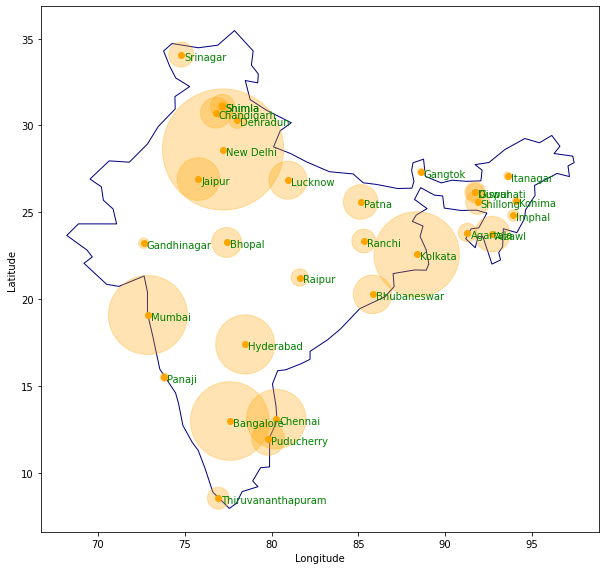

In [ ]:
ax = india.plot(color='white', edgecolor='#000080',figsize=(10, 10))

states.plot(ax=ax, color='orange')

capital_locations = states[['Capital', 'Latitude', 'Longitude']].dropna()

capital_locations.plot(kind='scatter', x='Longitude', y='Latitude', s=gdf["Population"] / 2000, ax=ax, color='orange', alpha=0.3,zorder=2)

for name, x, y in zip(df['Capital'], capital_locations['Longitude'], capital_locations['Latitude']):
    plt.annotate(name, xy=(x, y), xytext=(3, 3), textcoords="offset points", ha='left', va='top', color='green', fontsize=10, zorder=3)

In [ ]:
|